# Day 5: Feature Engineering based on EDA

### ***EDA Summary from Yesterday***

### ***1. Overall Dataset Insights***

- **Top 10 Most Valuable Players:** Identified the highest-value players, mainly from top-tier clubs.
- **Market Value by Position:** Strikers and attacking midfielders generally have higher market value than defenders.
- **Teams with Highest Average Market Value:** Big clubs dominate, with high-value star players driving the averages.
- **Market Value Distribution:** Skewed towards a few expensive players; most players fall in the mid-range.
- **Age vs. Market Value:** Younger players, especially with high potential, tend to be valued higher.

### ***2. Player Attributes vs. Market Value***

- **Overall Rating Impact:** Strong correlation; higher overall ratings increase market value.
- **Individual Attributes Correlation:** Attributes like pace, stamina, and dribbling correlate with higher market values.
- **International Reputation Effect:** More stars (higher reputation) contribute to higher market value.
- **Potential Rating vs Market Value:** High potential players tend to have higher market values, though other factors also play a role.
- **Physical Attributes:** Attributes like height, weight, and strength show weaker correlations, with pace being more impactful.

### ***3. Position-Specific Insights***

- **CAM/CM vs CDM/CM:** Attacking midfielders are generally more valuable than defensive ones.
- **Pace and Wingers:** Strong positive correlation; pace increases value for wingers (LW/RW).
- **Goalkeepers:** Market value trends differ from outfield players, with goalkeepers generally being less expensive.

### ***4. Contract & Transfer Market Insights***

- **Contract End Year Impact:** Players with fewer years left on their contract typically have lower market values.
- **Loan vs Permanent:** Loan players are valued lower than permanent squad members.

In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("../data/processed/data_after_eda.csv")

In [3]:
df.value_counts

<bound method DataFrame.value_counts of                Name      ID  Age Best position  Best overall  Overall rating  \
0      K. De Winter  265774   22            CB            74              72   
1     Andrey Santos  273018   20            CM            78              76   
2        G. Simeone  253396   21            ST            77              75   
3          M. Melia  276346   16            ST            64              62   
4      K. De Bruyne  192985   33            CM            89              89   
...             ...     ...  ...           ...           ...             ...   
4903     Fali Candé  256856   26            CB            71              69   
4904       J. Roche  256874   23            CM            72              70   
4905     J. Hawkins  256877   22            RM            64              63   
4906  Gaspar Campos  256885   24            ST            73              71   
4907       T. Booth  256887   23           CAM            70              69   


In [4]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)


## 1. Structuring the Dataset for Feature Engineering|

In [5]:
df.isnull().sum()

Name                           0
ID                             0
Age                            0
Best position                  0
Best overall                   0
Overall rating                 0
Potential                      0
Growth                      1285
foot                           0
Team                           0
Value                         86
Wage                          76
Release clause               600
Height_cm                      0
Weight_kg                      0
Acceleration                   0
Sprint speed                   0
Agility                        3
Reactions                      0
Balance                        3
Stamina                        0
Strength                       0
Jumping                        3
Total attacking                0
Crossing                       0
Finishing                      0
Heading accuracy               0
Short passing                  0
Volleys                        3
Total skill                    0
Dribbling 

In [6]:
df[df['Value'].isnull()]

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year,Log_Value
183,D. Lainez,237995,24,LM,77,76,80,4.0,Left,Mexico,NaN,NaN,NaN,168,58,83,83,89.0,67,91.0,67,42,57.0,326,75,64,48,75,64.0,344,81,67.0,50,64,82,170,50,61,59.0,39,61,57,14,13,14.0,7,9,308,75,67.0,66.0,74.0,292,61,65,1910,404,1,83,64,70,82,52,0,0,NaN
192,I. Reyes,252008,24,CDM,76,74,80,6.0,Right,Mexico,NaN,NaN,NaN,179,73,81,85,77.0,73,79.0,76,74,82.0,319,60,59,69,72,59.0,348,72,67.0,62,74,73,225,78,74,73.0,74,68,45,8,9,11.0,12,5,354,67,70.0,75.0,78.0,375,76,67,2061,440,1,83,65,69,74,75,0,0,NaN
311,A. Afif,234051,27,LM,78,78,78,NaN,Right,Qatar,NaN,NaN,NaN,176,70,87,87,81.0,72,72.0,74,51,65.0,343,71,79,48,74,71.0,373,81,77.0,66,70,79,92,28,36,28.0,27,37,44,7,14,8.0,5,10,287,78,69.0,76.0,78.0,329,70,69,1867,400,1,87,75,72,79,32,0,0,NaN
423,H. Martín,224151,31,ST,79,79,79,NaN,Right,Mexico,NaN,NaN,NaN,177,83,76,78,78.0,74,83.0,80,93,95.0,360,59,82,84,70,65.0,325,72,64.0,51,60,78,88,45,21,22.0,42,75,51,9,10,11.0,9,12,337,82,63.0,75.0,78.0,412,79,65,1962,418,1,77,77,64,75,39,0,0,NaN
487,L. Chávez,222382,28,CM,79,79,79,NaN,Left,Mexico,NaN,NaN,NaN,178,73,83,83,71.0,75,71.0,88,64,69.0,331,74,64,48,80,65.0,397,79,76.0,84,78,80,221,76,75,70.0,70,60,52,7,10,14.0,9,12,362,76,86.0,70.0,72.0,386,85,80,2132,453,1,83,72,80,78,71,0,0,NaN
589,Z. Ibrahimović,41236,40,ST,80,80,80,NaN,Right,Sweden,NaN,NaN,NaN,195,102,55,55,67.0,77,45.0,29,85,77.0,401,71,84,82,77,87.0,380,74,77.0,74,72,83,89,28,37,24.0,20,84,59,13,15,10.0,9,12,346,86,83.0,73.0,90.0,361,86,84,1935,395,5,55,84,76,76,34,0,0,NaN
649,Joselu,173608,34,ST,82,82,82,NaN,Right,Spain,NaN,NaN,NaN,191,86,64,63,63.0,80,34.0,67,83,89.0,387,58,86,90,78,75.0,354,74,73.0,65,60,82,74,26,28,20.0,30,67,52,11,11,8.0,15,7,342,87,73.0,85.0,75.0,400,84,77,1913,398,3,63,83,69,74,33,0,0,NaN
673,J. Gallardo,226045,29,LB,75,75,75,NaN,Left,Mexico,NaN,NaN,NaN,176,73,84,82,80.0,67,71.0,88,71,81.0,330,75,69,64,73,49.0,336,76,73.0,47,66,74,209,72,70,67.0,65,65,47,9,7,8.0,12,11,336,72,69.0,65.0,68.0,374,75,59,2016,439,1,83,67,70,75,69,0,0,NaN
682,A. Vega,233260,26,CAM,78,77,77,NaN,Right,Mexico,NaN,NaN,NaN,173,77,81,79,83.0,72,86.0,75,75,81.0,348,69,76,64,74,65.0,378,81,72.0,75,72,78,81,44,19,18.0,26,64,43,5,11,12.0,8,7,317,75,86.0,66.0,75.0,392,80,81,1960,417,1,80,77,75,80,32,0,0,NaN
694,F. Coman,238274,26,LW,74,74,75,1.0,Right,Romania,NaN,NaN,NaN,182,72,86,88,90.0,70,73.0,72,66,76.0,326,66,70,56,70,64.0,364,75,72.0,75,65,77,88,36,27,25.0,33,64,60,15,13,13.0,7,12,300,70,69.0,64.0,70.0,358,74,70,1903,405,1,87,70,69,77,34,0,0,NaN


In [7]:
df = df.dropna(subset=['Value'])

In [8]:
df = df.drop(columns=['Release clause', 'Growth'])


In [9]:
df.isnull().sum()

Name                         0
ID                           0
Age                          0
Best position                0
Best overall                 0
Overall rating               0
Potential                    0
foot                         0
Team                         0
Value                        0
Wage                         0
Height_cm                    0
Weight_kg                    0
Acceleration                 0
Sprint speed                 0
Agility                      0
Reactions                    0
Balance                      0
Stamina                      0
Strength                     0
Jumping                      0
Total attacking              0
Crossing                     0
Finishing                    0
Heading accuracy             0
Short passing                0
Volleys                      0
Total skill                  0
Dribbling                    0
Curve                        0
FK Accuracy                  0
Long passing                 0
Ball con

In [10]:
df.dropna(subset=['Composure'], inplace=True)

## 2. Fixing Skewed Numerical Values

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
df.dtypes


Name                         object
ID                            int64
Age                           int64
Best position                object
Best overall                  int64
Overall rating                int64
Potential                     int64
foot                         object
Team                         object
Value                       float64
Wage                        float64
Height_cm                     int64
Weight_kg                     int64
Acceleration                  int64
Sprint speed                  int64
Agility                     float64
Reactions                     int64
Balance                     float64
Stamina                       int64
Strength                      int64
Jumping                     float64
Total attacking               int64
Crossing                      int64
Finishing                     int64
Heading accuracy              int64
Short passing                 int64
Volleys                     float64
Total skill                 

In [13]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year,Log_Value
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,5500000.0,27000.0,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028,15.520259
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16500000.0,64000.0,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025,16.618871
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,12500000.0,36000.0,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028,16.341239
3,M. Melia,276346,16,ST,64,62,82,Right,St Patrick's Athletic FC,1100000.0,2000.0,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026,13.910822
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,63500000.0,270000.0,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025,17.966550


In [14]:
# check skewness for all numerical features
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)


ID                         -2.665490
Age                         0.788457
Best overall               -0.174273
Overall rating             -0.151772
Potential                  -0.446678
Value                       4.588855
Wage                        3.580986
Height_cm                  -0.053918
Weight_kg                   0.232230
Acceleration               -1.080499
Sprint speed               -1.104431
Agility                    -0.775305
Reactions                  -0.292871
Balance                    -0.740358
Stamina                    -1.077531
Strength                   -0.471840
Jumping                    -0.475635
Total attacking            -1.332802
Crossing                   -0.882990
Finishing                  -0.696450
Heading accuracy           -0.919351
Short passing              -1.409184
Volleys                    -0.409137
Total skill                -1.137959
Dribbling                  -1.675015
Curve                      -0.664447
FK Accuracy                -0.161757
L

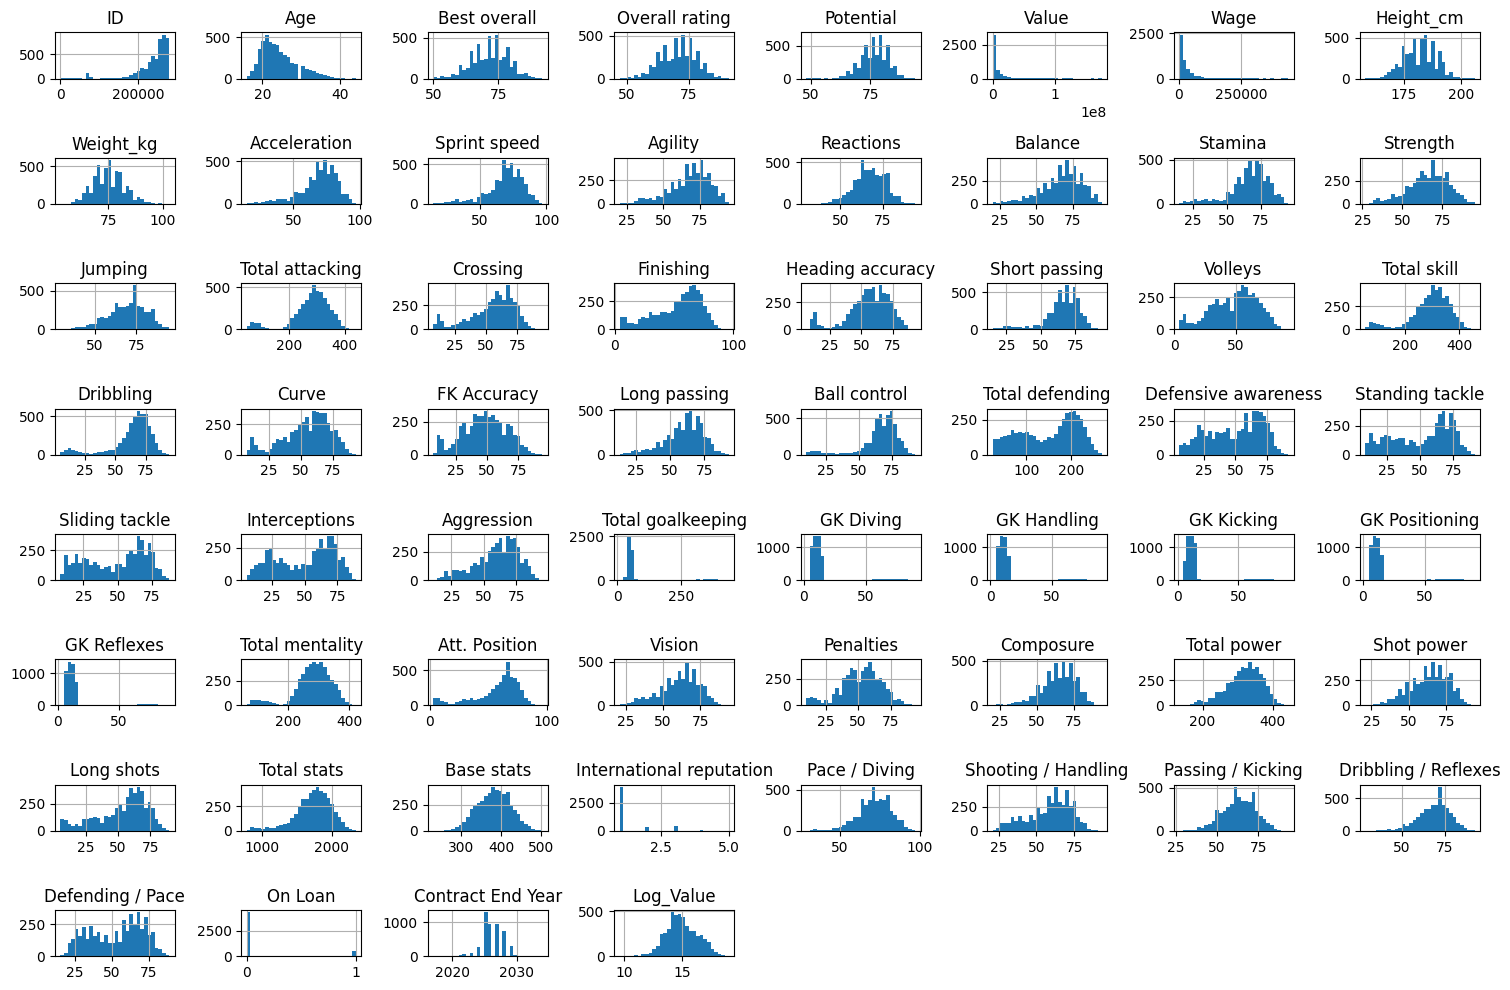

In [15]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()



Let's transoform all money related features: value and wage:

In [16]:
df["Value"] = np.log1p(df["Value"])  # log(1 + x) to avoid log(0) issues
df["Wage"] = np.log1p(df["Wage"])

In [17]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year,Log_Value
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028,15.520259
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025,16.618871
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028,16.341239
3,M. Melia,276346,16,ST,64,62,82,Right,St Patrick's Athletic FC,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026,13.910822
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025,17.966550


In [18]:
df.drop(columns=['Log_Value'], inplace=True)

In [19]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028
3,M. Melia,276346,16,ST,64,62,82,Right,St Patrick's Athletic FC,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025


<Axes: xlabel='Value', ylabel='Count'>

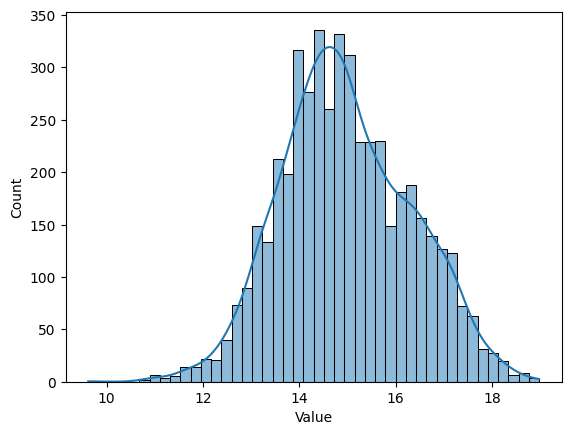

In [20]:
sns.histplot(df['Value'], kde=True)

<Axes: xlabel='Wage', ylabel='Count'>

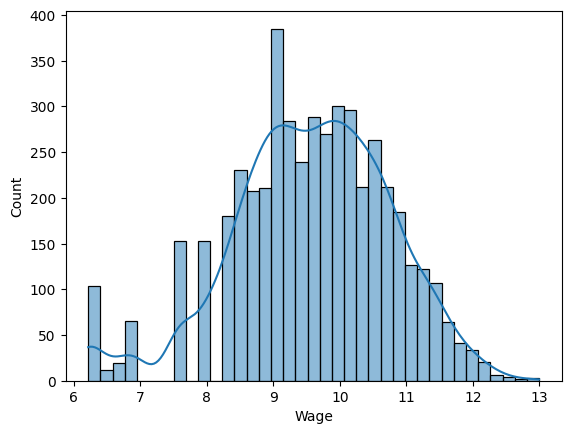

In [21]:
sns.histplot(df['Wage'], kde=True)

<Axes: xlabel='Sliding tackle', ylabel='Count'>

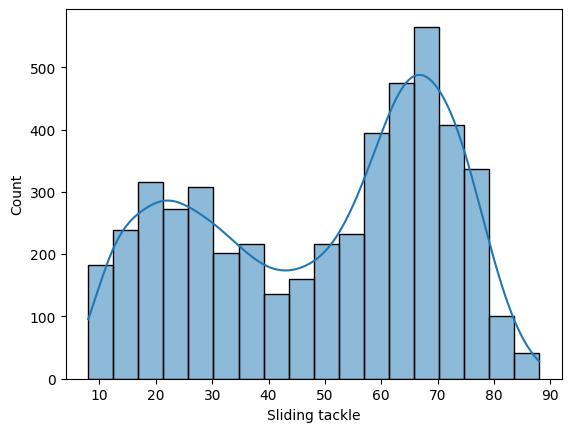

In [22]:
sns.histplot(df['Sliding tackle'], kde=True)

## 3. Conversion of Categorical Features

In [23]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028
3,M. Melia,276346,16,ST,64,62,82,Right,St Patrick's Athletic FC,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025


<Axes: xlabel='foot', ylabel='Value'>

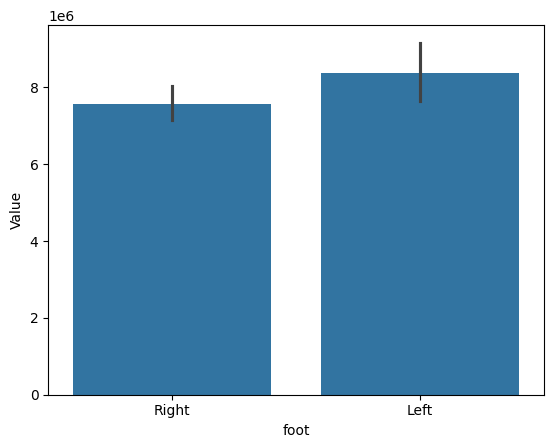

In [24]:
sns.barplot(x='foot', y=np.exp(df['Value']), data=df)

In [25]:
(np.exp(df['Value']) - 1).head()

0     5500000.0
1    16500000.0
2    12500000.0
3     1100000.0
4    63500000.0
Name: Value, dtype: float64

<Axes: xlabel='Best position', ylabel='Value'>

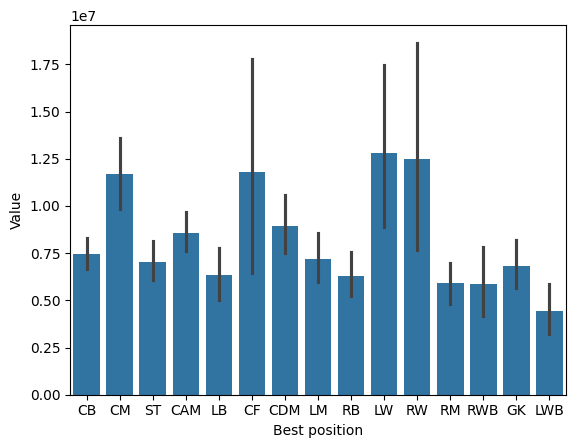

In [26]:
sns.barplot(x='Best position', y=np.exp(df['Value']), data=df, estimator=np.mean)

In [27]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028
3,M. Melia,276346,16,ST,64,62,82,Right,St Patrick's Athletic FC,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025


In [28]:
df['Team'].value_counts()

Team
Chelsea                                 40
Manchester City                         32
Manchester United                       31
Paris Saint-Germain                     31
AC Milan                                31
FC Barcelona                            31
Newcastle United                        30
Southampton                             30
Arsenal                                 30
Aston Villa                             30
Sporting CP                             29
Como                                    29
AS Monaco                               29
Burnley                                 28
Atlético Madrid                         28
Tottenham Hotspur                       28
SL Benfica                              27
Bayer 04 Leverkusen                     27
FC Bayern München                       27
Real Madrid                             27
VfB Stuttgart                           27
Ajax                                    27
Inter                                   27
Nottin

Let's implement one hot encoding for categorical variables. Additionally, we will group the teams that have fewer than 11 players in our dataset.

In [29]:
team_counts = df['Team'].value_counts()

In [30]:
low_teams = team_counts[team_counts < 11].index

In [31]:
df['Team'] = df['Team'].apply(lambda x: 'Others' if x in low_teams else x)

In [32]:
df.sample(10)

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year
277,N. Schlotterbeck,247819,24,CB,87,85,88,Left,Borussia Dortmund,18.005165,11.082158,191,86,78,76,68.0,83,64.0,74,84,91.0,323,53,51,85,78,56.0,324,74,52.0,41,86,71,258,85,87,86.0,83,83,53,8,10,8.0,14,13,334,58,72.0,38.0,78.0,390,75,66,2051,446,3,77,59,70,73,85,0,2027
4597,H. Vaughan,261420,20,RM,66,63,74,Right,Hull City,13.910822,9.952325,168,67,79,73,87.0,59,89.0,68,35,41.0,257,60,54,29,62,52.0,309,67,63.0,58,57,64,127,42,46,39.0,40,41,44,7,15,9.0,6,7,252,58,62.0,51.0,63.0,241,54,43,1617,344,1,76,52,61,69,41,0,2026
2658,A. Suljić,253128,32,LM,65,65,65,Left,Others,13.262127,7.601402,174,68,78,71,73.0,45,76.0,67,55,55.0,259,62,58,31,65,43.0,303,65,55.0,56,63,64,78,35,21,22.0,47,63,52,6,9,10.0,13,14,290,62,67.0,51.0,62.0,268,52,39,1593,347,1,74,52,64,65,32,0,2025
689,M. Guendouzi,236496,25,CM,82,80,84,Right,Lazio,17.092655,10.778977,185,68,69,74,83.0,79,71.0,89,75,76.0,355,71,68,69,83,64.0,379,77,75.0,67,79,81,221,72,77,72.0,79,86,49,6,13,6.0,13,11,390,74,81.0,70.0,82.0,388,75,73,2158,456,2,72,71,78,79,75,0,2028
1303,A. Al Dakhil,263573,22,CB,74,72,79,Right,VfB Stuttgart,15.297115,9.741027,187,70,69,70,58.0,69,60.0,68,75,80.0,214,27,22,72,68,25.0,235,59,29.0,16,66,65,216,72,73,71.0,71,74,50,9,14,9.0,10,8,239,15,47.0,32.0,70.0,288,41,24,1568,355,1,70,27,51,62,72,0,2028
3946,Kim Yong Hak,272847,20,CAM,63,62,70,Left,Others,13.681980,6.908755,172,65,73,71,71.0,60,76.0,37,36,42.0,273,54,59,43,57,60.0,287,65,59.0,40,59,64,96,28,35,33.0,23,28,57,13,9,9.0,11,15,228,61,58.0,58.0,57.0,221,54,52,1513,316,1,72,57,56,65,31,0,2027
3941,L. Kuavita,272776,20,CAM,64,62,74,Left,Others,13.764218,8.987322,180,68,62,62,55.0,62,65.0,66,71,71.0,280,45,59,60,65,51.0,304,66,58.0,51,62,67,157,52,54,51.0,54,65,47,8,13,9.0,11,6,284,63,54.0,48.0,68.0,322,61,53,1700,364,1,62,57,57,65,54,0,2025
4721,M. Lazo,259542,19,CB,68,66,77,Right,Others,14.346139,6.216606,178,67,62,63,48.0,64,72.0,64,60,67.0,193,25,20,66,61,21.0,189,24,31.0,21,55,58,208,68,74,66.0,65,66,42,8,9,8.0,11,6,220,25,27.0,37.0,56.0,265,41,33,1426,309,1,63,28,43,43,69,0,2024
2642,A. Candela,252315,24,RB,72,72,78,Right,Others,15.068274,9.210440,185,74,84,84,75.0,66,64.0,81,74,81.0,299,71,50,60,65,53.0,311,66,66.0,50,62,67,199,66,68,65.0,67,67,55,10,11,13.0,13,8,301,55,60.0,52.0,63.0,352,64,52,1890,410,1,84,54,64,67,66,0,2027
2245,S. 't Zand,73964,21,CAM,69,67,80,Right,Others,14.731802,9.210440,178,70,74,77,73.0,63,76.0,61,64,64.0,297,58,65,49,65,60.0,335,71,66.0,67,61,70,168,54,56,58.0,50,62,41,8,10,11.0,6,6,304,61,66.0,65.0,63.0,331,75,67,1839,393,1,76,67,63,70,54,1,2025


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

After considering various encoding methods for the 'Team' feature in my dataset, I have decided to apply target encoding. This involves calculating the mean market value for each club and then encoding each team with its corresponding mean market value.

In [34]:
from sklearn.model_selection import KFold 

In [35]:
df['Team_encoded'] = np.nan # create an empty column where cross-validation encoded values will be stored

In [36]:
df.reset_index(drop=True, inplace=True)  # reset index to ensure continuous indices

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # set up 5-fold cross-validation, shuffle data for randomness
for train_idx, val_idx in kf.split(df):  # iterate through the splits
    train_df, val_df = df.iloc[train_idx], df.iloc[val_idx]  # split data into train and validation sets
    
    team_mean_cv = train_df.groupby('Team')['Value'].mean()
    df.loc[val_idx, 'Team_encoded'] = val_df['Team'].map(team_mean_cv)  # map each team's mean value to the validation set


In [37]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year,Team_encoded
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028,14.960267
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025,14.939842
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028,16.318711
3,M. Melia,276346,16,ST,64,62,82,Right,Others,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026,14.150029
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025,16.651179


In [38]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year,Team_encoded
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028,14.960267
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025,14.939842
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028,16.318711
3,M. Melia,276346,16,ST,64,62,82,Right,Others,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026,14.150029
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025,16.651179


In [39]:
cols = ['foot', 'Best position']    

In [40]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # instantiate one-hot encoder
  # ignore unknown categories in the validation set

In [41]:
encoded_array = encoder.fit_transform(df[cols])  # fit and transform the training set

In [42]:
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cols))  # convert to DataFrame

In [43]:
encoded_df.head()

,foot_Left,foot_Right,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
encoded_df.index = df.index

In [45]:
df = pd.concat([df, encoded_df], axis=1)

In [46]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year,Team_encoded,foot_Left,foot_Right,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028,14.960267,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025,14.939842,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028,16.318711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,M. Melia,276346,16,ST,64,62,82,Right,Others,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026,14.150029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025,16.651179,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Contract Based Feature Engineering

In [47]:
df["Years left"] = df["Contract End Year"] - 2025  # assuming data is from 2025
df.drop("Contract End Year", axis=1, inplace=True)

In [48]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Team_encoded,foot_Left,foot_Right,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,14.960267,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,14.939842,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,16.318711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,M. Melia,276346,16,ST,64,62,82,Right,Others,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,14.150029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,16.651179,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 5. Scaling Numerical Features

In [49]:
from sklearn.preprocessing import MinMaxScaler

models like linear regression and neural networks perform **better when numerical features are scaled**.

we will apply **min-max scaling** (values between 0 and 1) to prevent **bias towards large numbers** .

In [50]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Team_encoded,foot_Left,foot_Right,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,14.960267,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,14.939842,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,16.318711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,M. Melia,276346,16,ST,64,62,82,Right,Others,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,14.150029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,16.651179,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [51]:
num_features = [
    "Total attacking", "Total skill", "Total defending", "Total mentality", "Total power", "Total goalkeeping"
]

scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

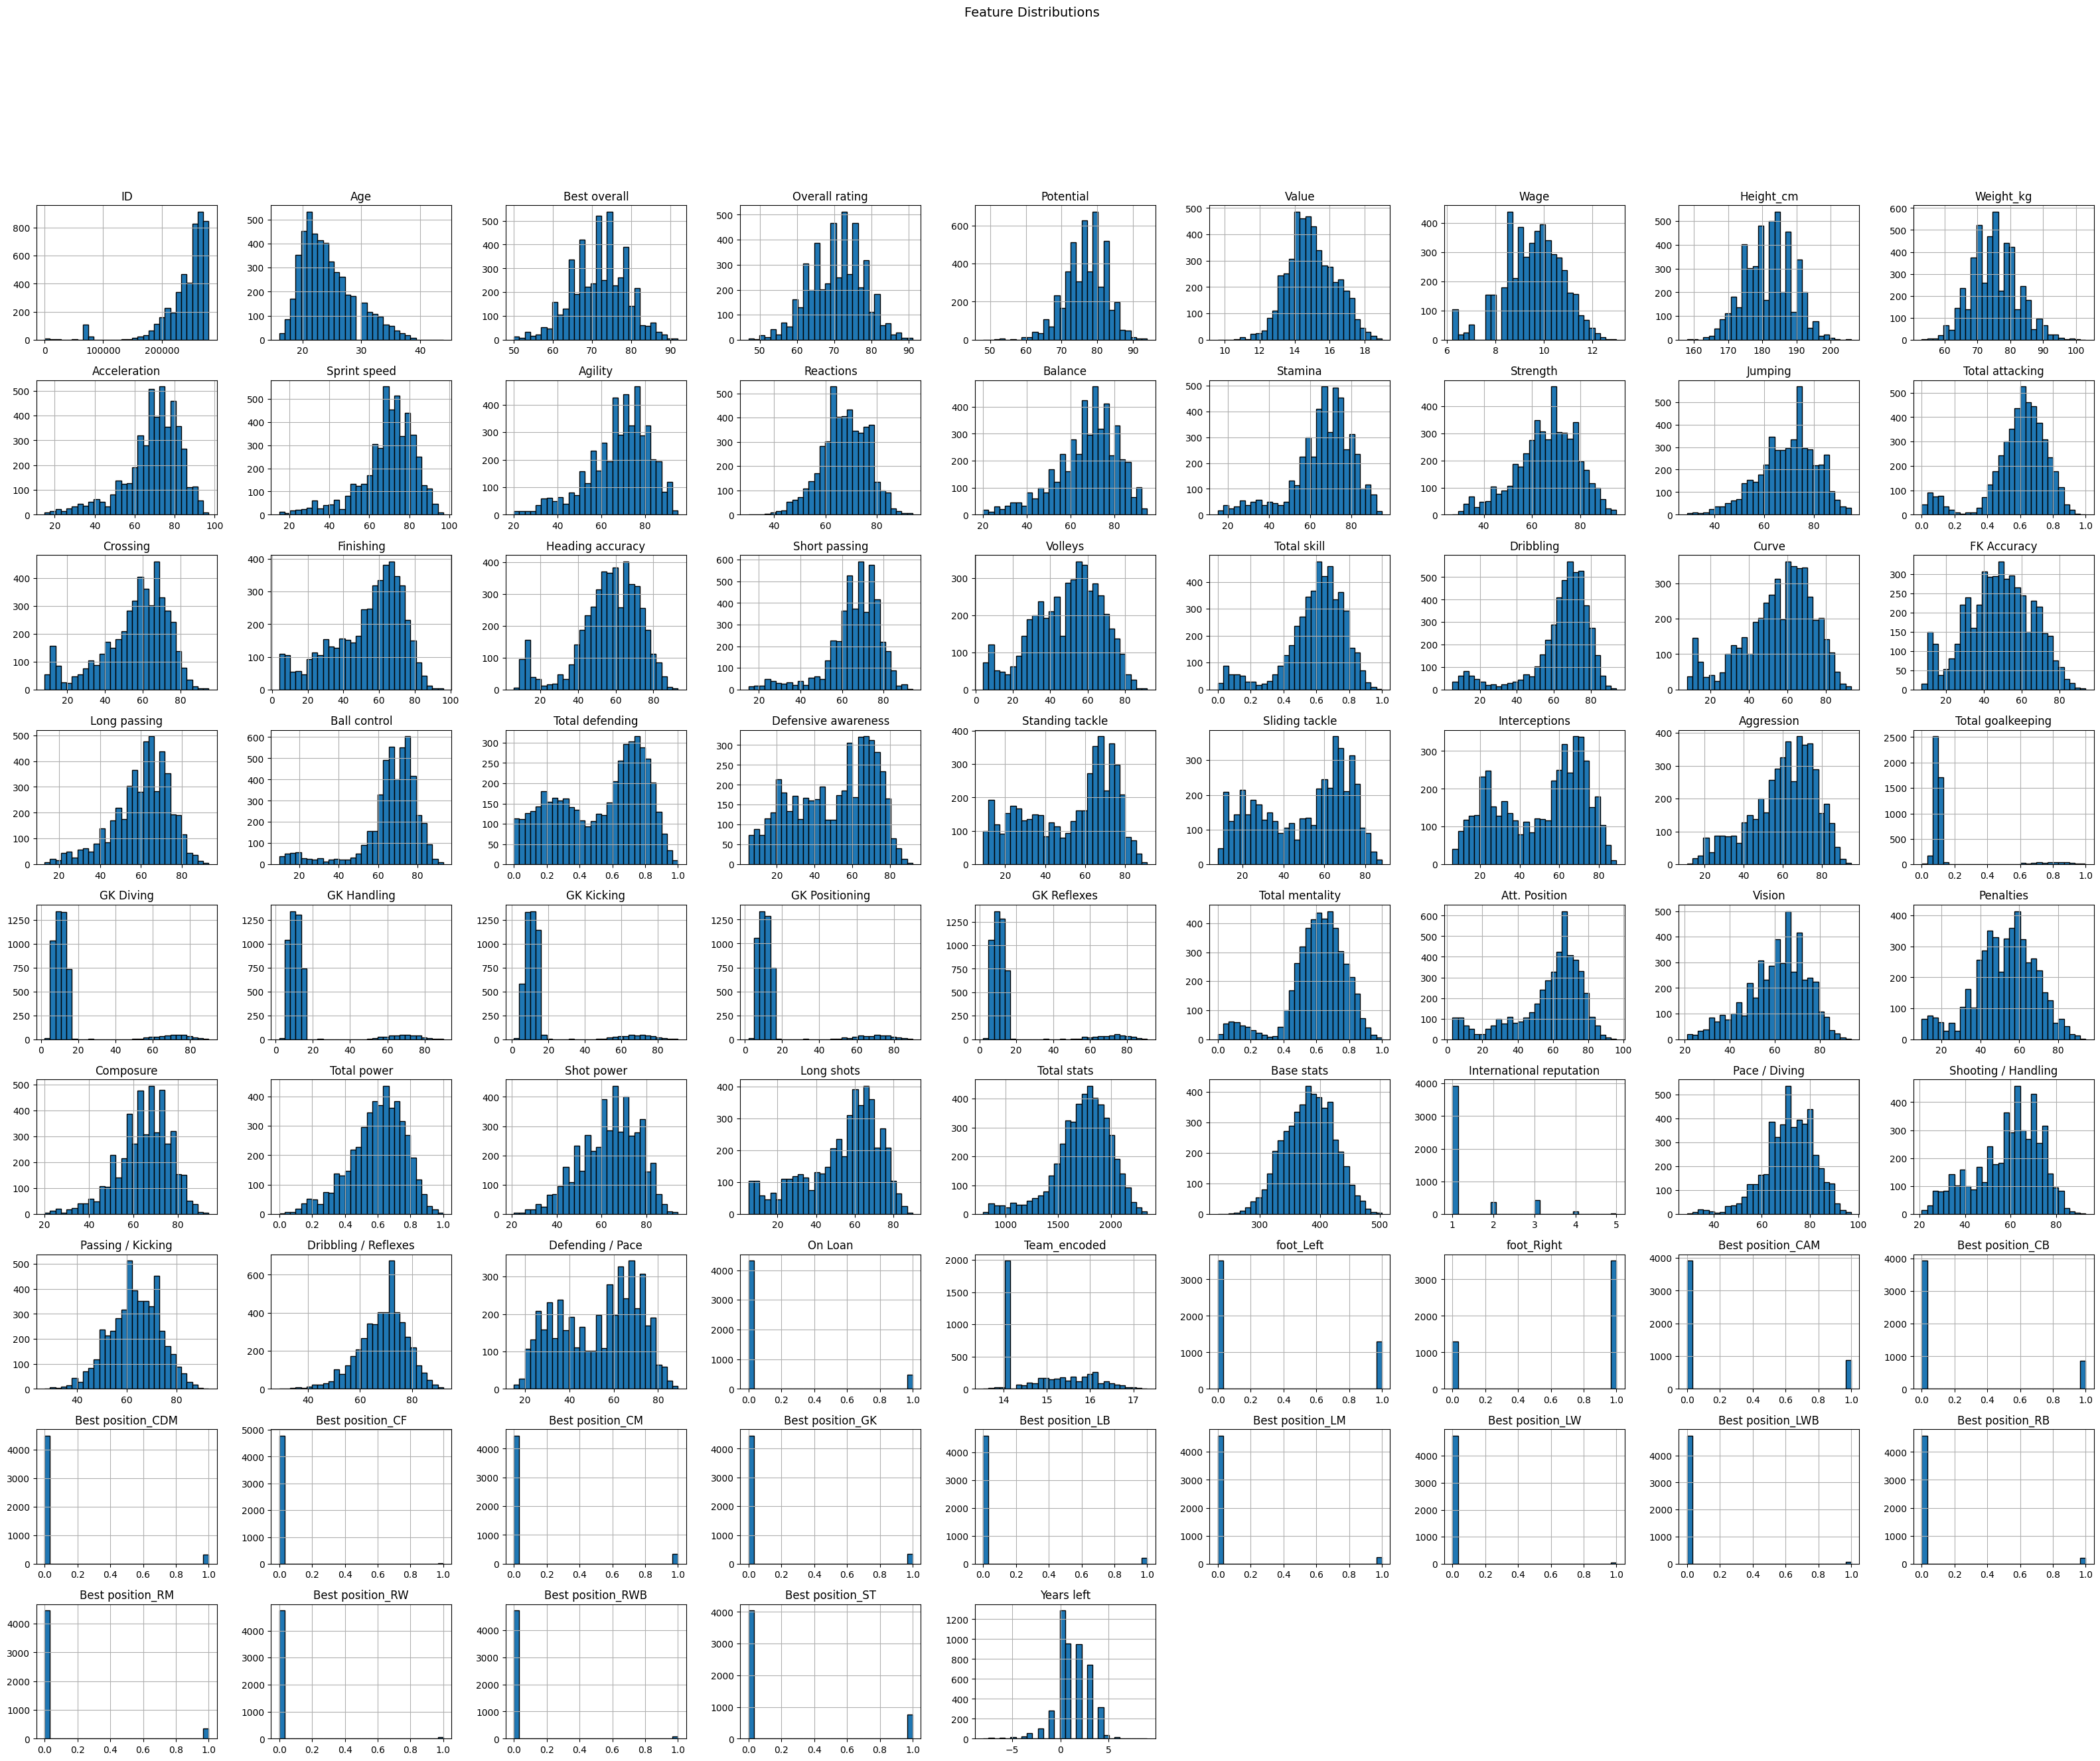

In [52]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(40, 30), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


In [53]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Team_encoded,foot_Left,foot_Right,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,372,1,67,39,57,65,72,0,14.960267,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,441,1,75,67,71,77,74,1,14.939842,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,403,1,85,71,66,76,26,0,16.318711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,M. Melia,276346,16,ST,64,62,82,Right,Others,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,0.584810,51,61,57,56,52.0,0.548148,63,54.0,51,43,63,0.177686,22,21,25.0,24,56,0.072600,12,10,8.0,5,6,0.535014,63,54.0,59.0,63.0,0.620579,62,61,1594,341,1,74,61,52,64,26,0,14.150029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,0.924051,95,84,55,94,83.0,0.975309,86,93.0,83,93,92,0.677686,66,70,53.0,66,75,0.107728,15,13,5.0,10,13,0.955182,88,94.0,83.0,88.0,0.871383,92,90,2292,474,5,67,87,93,87,65,0,16.651179,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


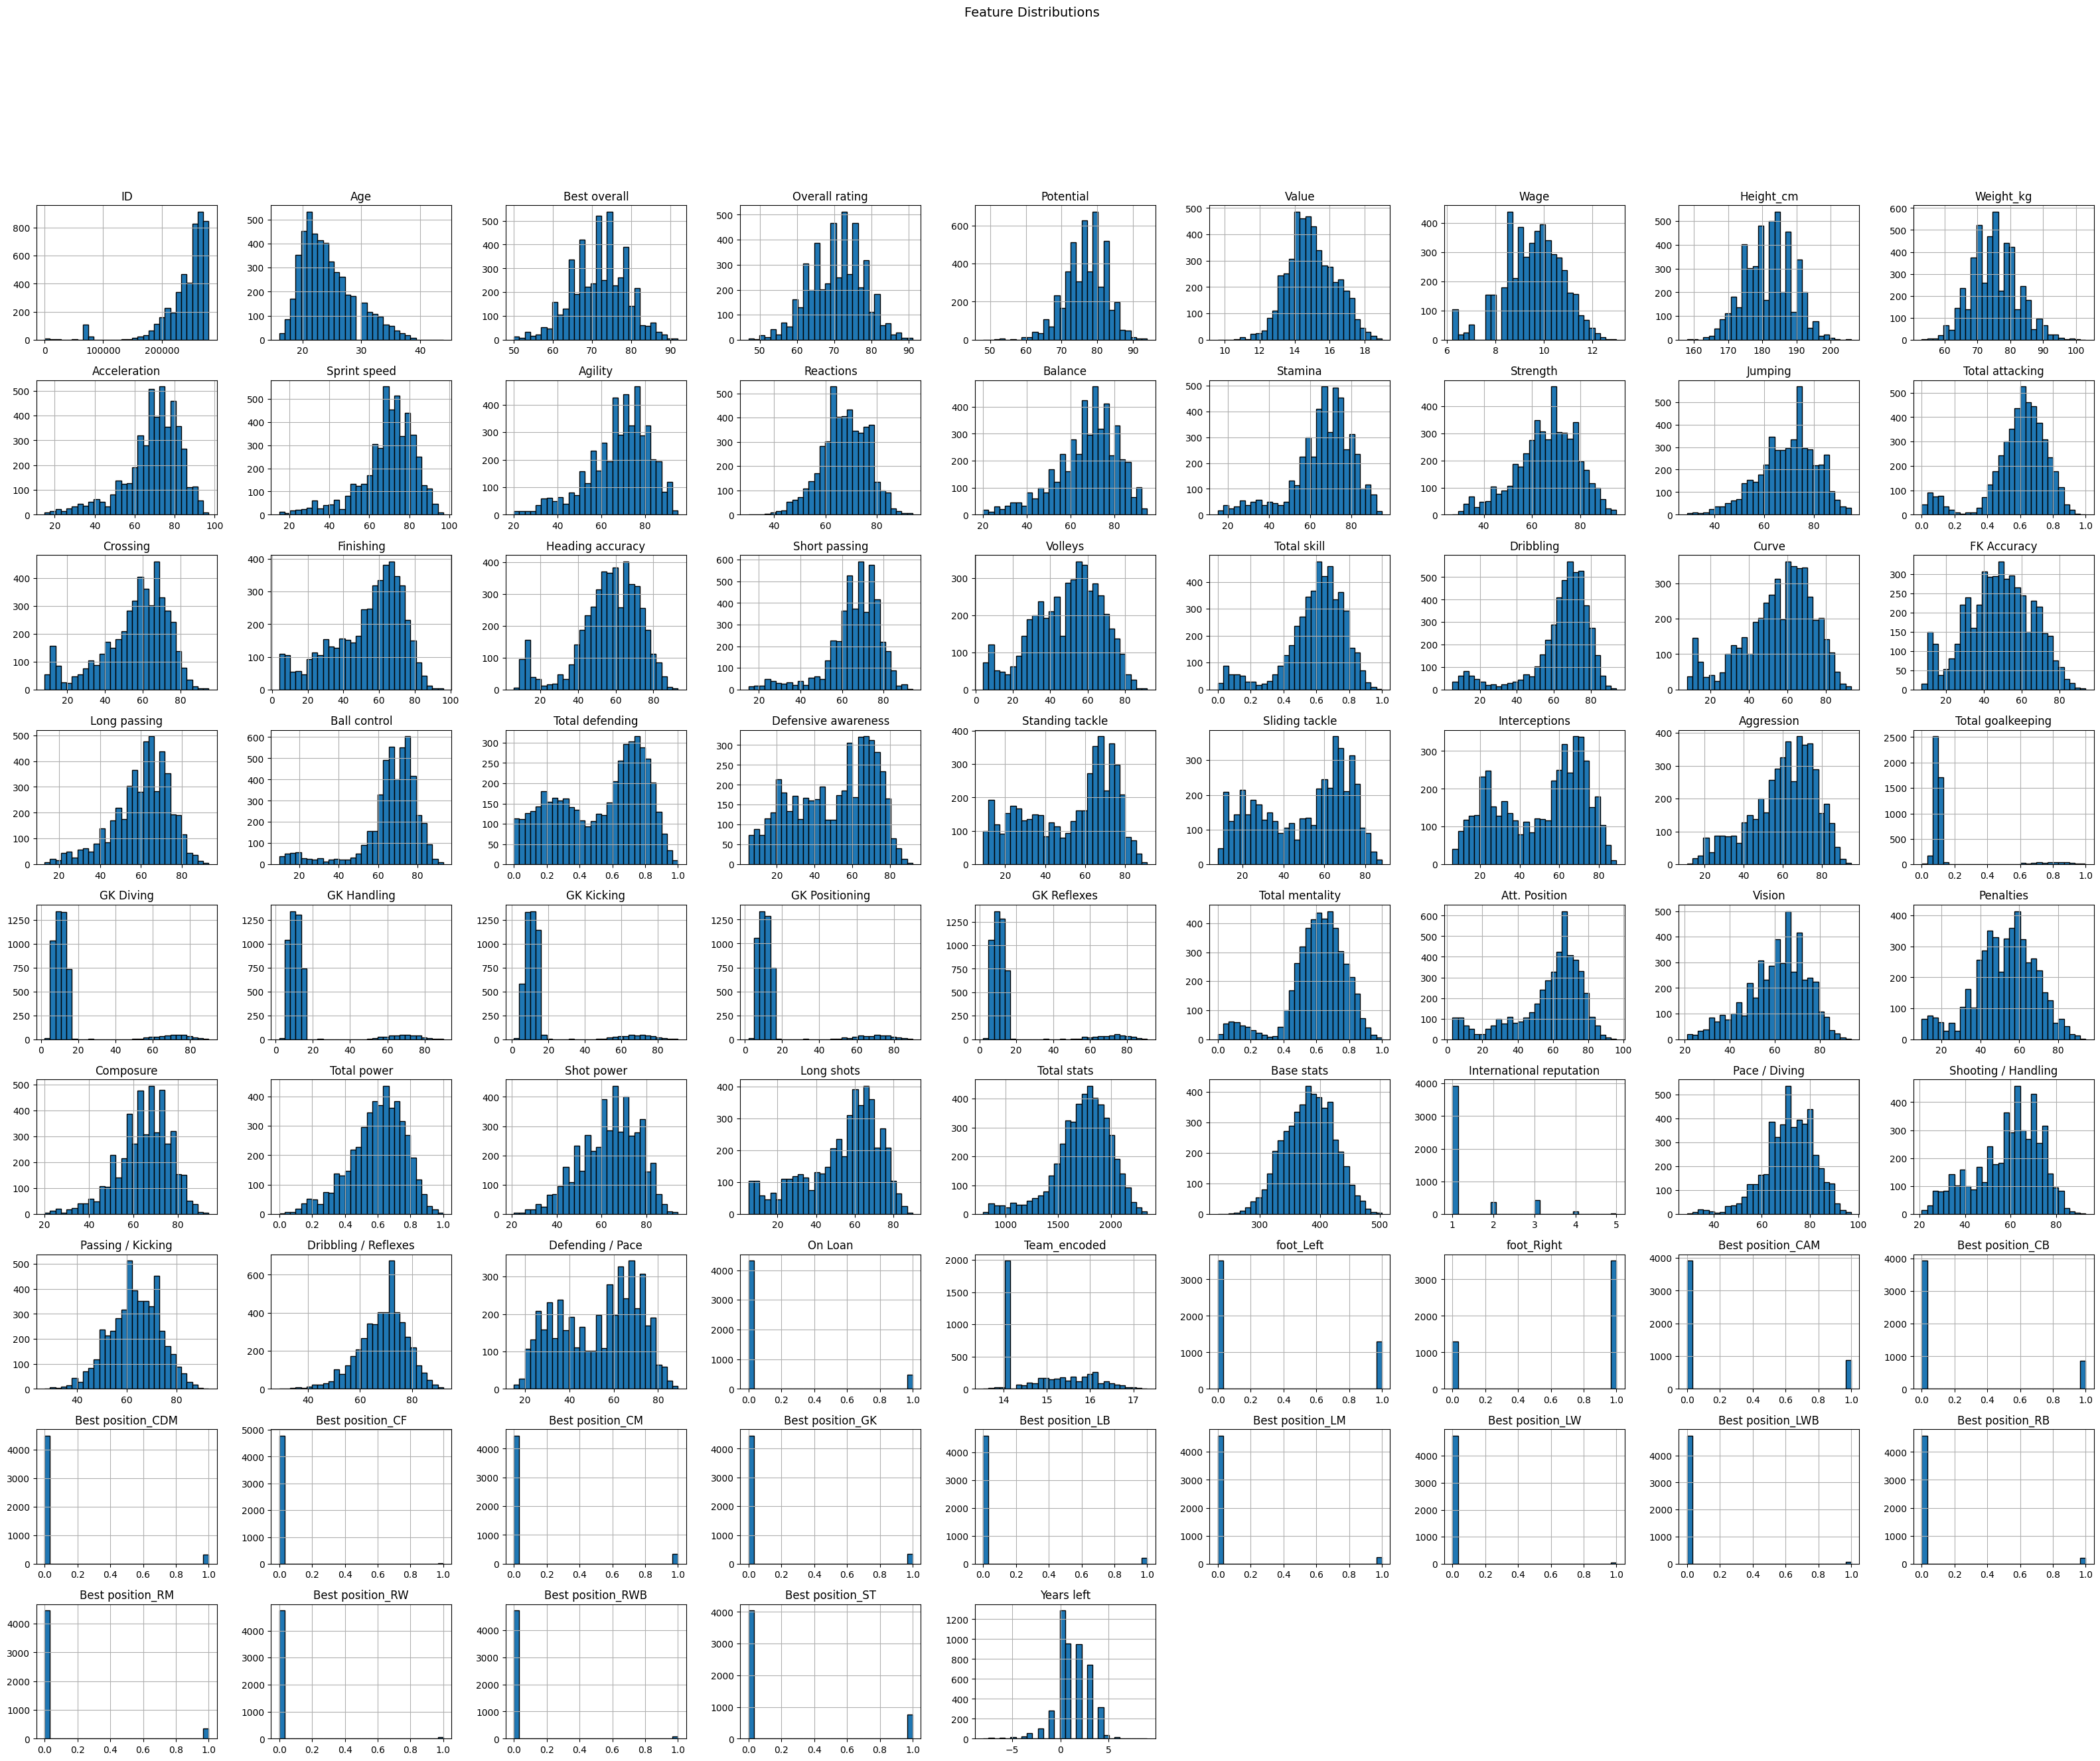

In [54]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(40, 30), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

## 5. Position Based Feature Engineering

right now, best position has many unique values like ST, LW, CM, CB, GK, etc. let's group them into broader categories first, like Attacker, midfielders and defenders

In [55]:
# define position categories
def position_category(pos):
    if pos in ["ST", "CF", "LW", "RW"]:
        return "Forward"
    elif pos in ["CAM", "CM", "CDM", "RM", "LM"]:
        return "Midfielder"
    elif pos in ["CB", "RB", "LB", "RWB", "LWB"]:
        return "Defender"
    elif pos == "GK":
        return "Goalkeeper"
    else:
        return "Other"

# apply function
df["Position Category"] = df["Best position"].apply(position_category)

Here comes the real part when working with features: 
 players in different positions have different key attributes. let's create new features based on this.

In [56]:
df["Forward Score"] = df[["Finishing", "Shot power", "Dribbling", "Acceleration", "Sprint speed"]].mean(axis=1)
df["Midfielder Score"] = df[["Short passing", "Long passing", "Vision", "Ball control", "Stamina"]].mean(axis=1)
df["Defender Score"] = df[["Defensive awareness", "Interceptions", "Standing tackle", "Sliding tackle", "Strength"]].mean(axis=1)
df["Goalkeeper Score"] = df[["GK Diving", "GK Reflexes", "GK Handling", "GK Positioning", "GK Kicking"]].mean(axis=1)

In [57]:
df.sample(10)

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Team_encoded,foot_Left,foot_Right,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Position Category,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score
1517,J. Robinson,199027,30,CB,70,70,70,Left,Sheffield United,14.077876,10.518700,180,67,66,54,68.0,68,70.0,71,71,74.0,0.549367,58,40,69,64,32.0,0.577778,55,60.0,40,67,64,0.772727,71,71,70.0,70,81,0.110070,14,14,13.0,10,6,0.666667,52,57.0,43.0,59.0,0.527331,43,38,1744,365,1,59,41,60,61,71,0,14.956658,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Defender,51.6,64.6,70.6,11.4
1500,I. Perišić,181458,35,RM,77,76,76,Right,PSV,14.946913,9.392745,186,80,74,68,69.0,72,69.0,74,71,84.0,0.881013,84,72,77,80,81.0,0.832099,78,79.0,75,77,80,0.743802,70,70,65.0,70,68,0.065574,6,7,10.0,9,6,0.843137,76,76.0,76.0,83.0,0.819936,83,76,2132,445,3,71,76,79,77,70,0,15.949318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,Midfielder,75.0,77.4,69.2,7.6
115,J. Frimpong,253149,23,RM,84,84,86,Right,Bayer 04 Leverkusen,17.813711,11.461643,172,65,96,91,89.0,84,90.0,85,58,73.0,0.716456,82,66,52,78,51.0,0.753086,85,77.0,47,64,84,0.859504,78,78,77.0,78,77,0.103044,12,7,8.0,13,14,0.812325,83,74.0,43.0,78.0,0.636656,62,53,2109,458,3,93,62,74,85,75,0,16.293792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,Midfielder,80.0,77.0,73.8,10.8
361,Marcos Llorente,226161,29,RM,83,83,83,Right,Atlético Madrid,17.385043,11.407576,184,74,87,91,83.0,81,74.0,91,77,84.0,0.820253,76,80,67,81,66.0,0.814815,81,78.0,63,80,80,0.867769,79,82,74.0,83,80,0.096019,13,6,6.0,11,15,0.899160,79,79.0,65.0,79.0,0.906752,84,79,2255,486,3,89,79,78,80,79,0,16.570813,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,Midfielder,84.6,82.2,79.0,10.2
2177,Taison,188803,36,RW,76,75,75,Right,PAOK,14.403298,9.998843,172,67,81,82,82.0,58,82.0,68,65,74.0,0.784810,73,74,56,75,78.0,0.802469,82,65.0,74,74,82,0.413223,32,53,40.0,42,55,0.100703,7,7,11.0,15,13,0.677871,70,70.0,70.0,76.0,0.733119,78,76,1964,419,2,82,75,73,81,44,0,15.318348,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Forward,79.4,73.8,46.4,10.6
1825,A. Král,247028,26,CDM,76,75,79,Right,RCD Espanyol,15.761421,10.275086,187,80,73,76,75.0,74,77.0,82,76,83.0,0.749367,68,63,72,74,65.0,0.708642,76,66.0,51,70,76,0.805785,73,74,73.0,74,78,0.110070,11,13,10.0,11,12,0.803922,67,74.0,59.0,74.0,0.823151,78,70,2074,441,1,75,68,71,76,73,1,14.905013,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Midfielder,73.2,75.2,74.0,11.4
2081,L. Hrádecký,190941,34,GK,83,83,83,Right,Bayer 04 Leverkusen,15.607270,11.066654,192,85,38,44,43.0,82,39.0,34,55,60.0,0.065823,11,11,11,30,9.0,0.091358,10,11.0,15,33,20,0.033058,10,10,13.0,18,31,0.915691,85,80,69.0,82,85,0.184874,9,53.0,20.0,45.0,0.263666,52,14,1187,441,3,85,80,69,85,40,0,16.541677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Goalkeeper,31.0,34.0,21.2,80.2
3292,Wang Gang,199088,35,RB,64,64,64,Right,Others,12.100718,9.105091,188,81,70,78,56.0,63,65.0,72,82,80.0,0.54

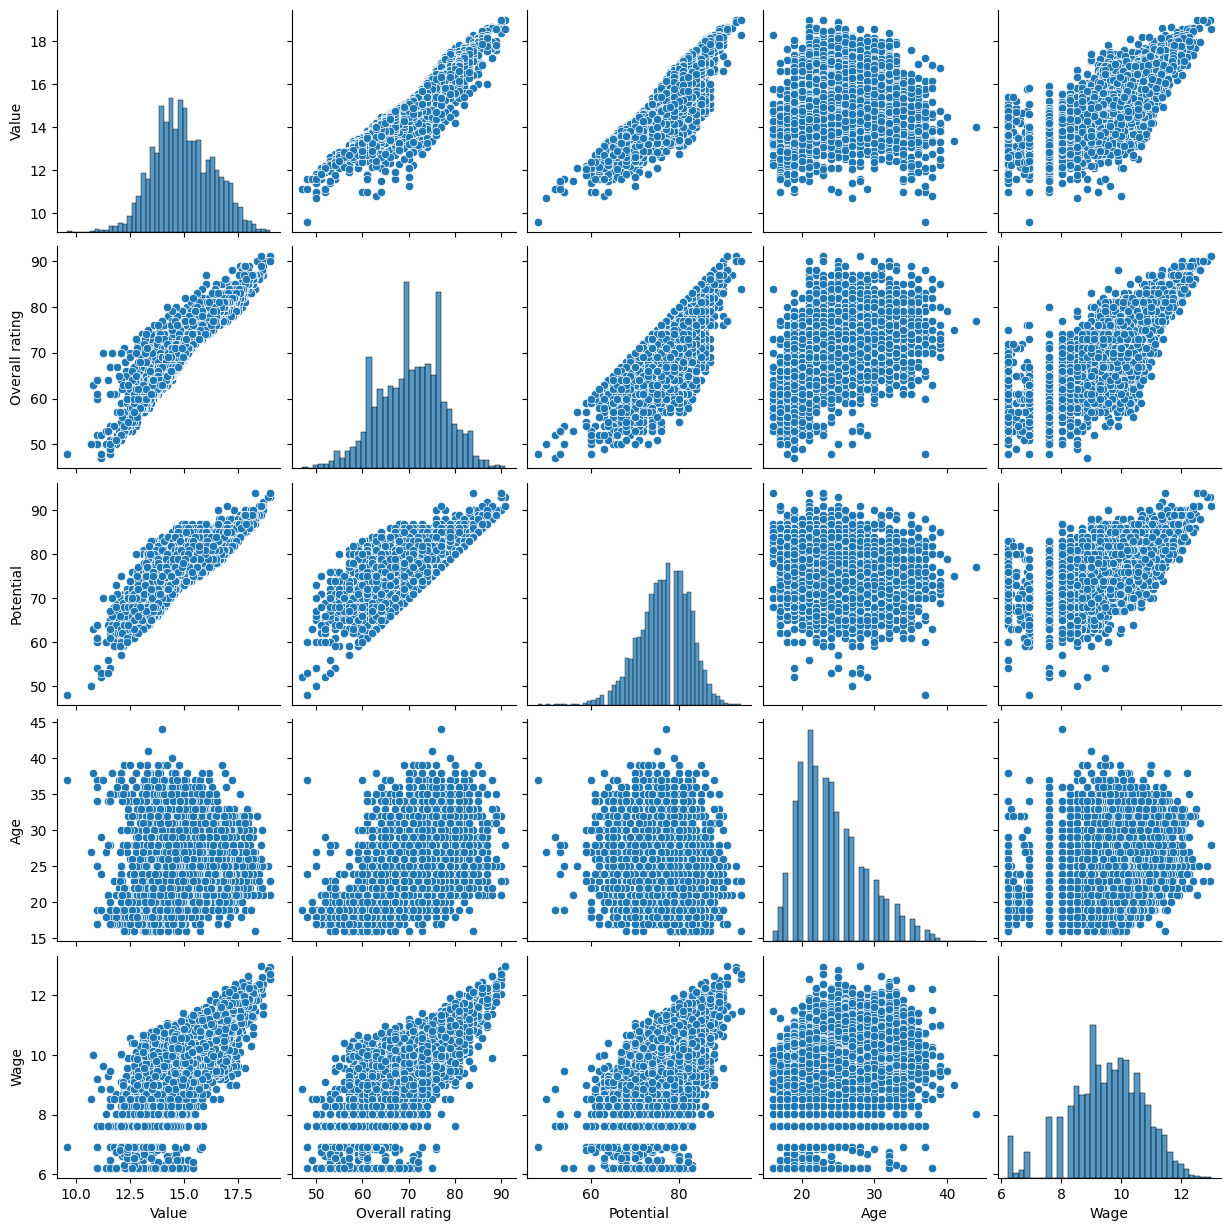

In [58]:
import seaborn as sns

important_features = ['Value', 'Overall rating', 'Potential', 'Age', 'Wage']
sns.pairplot(df[important_features])
plt.show()


C:\Users\samir\AppData\Local\Temp\ipykernel_33124\1727605754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Best position'], y=df['Value'], palette="coolwarm")


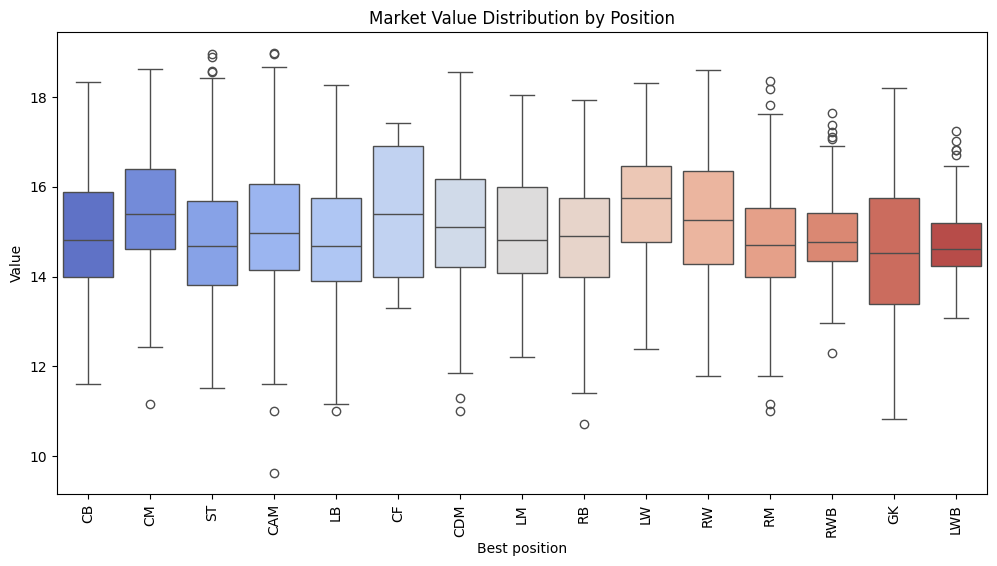

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Best position'], y=df['Value'], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Market Value Distribution by Position")
plt.show()


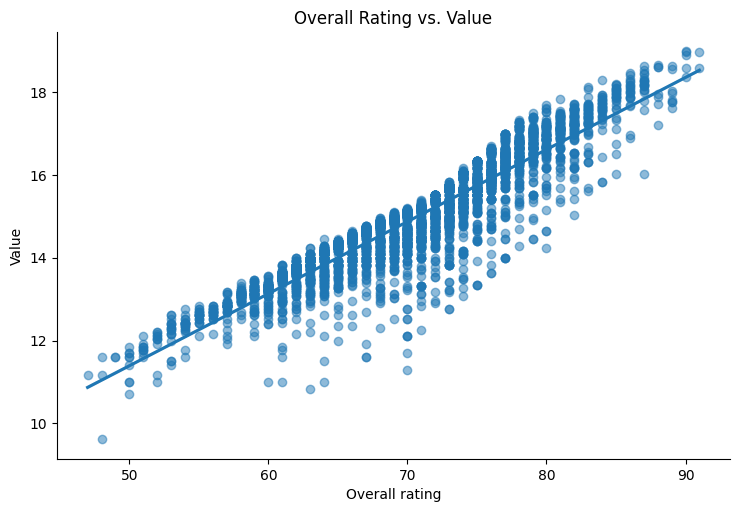

In [60]:
sns.lmplot(x="Overall rating", y="Value", data=df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Overall Rating vs. Value")
plt.show()


In [61]:
df.head()

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,foot,Team,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Team_encoded,foot_Left,foot_Right,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Position Category,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score
0,K. De Winter,265774,22,CB,74,72,84,Right,Genoa,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,372,1,67,39,57,65,72,0,14.960267,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Defender,56.2,61.0,72.8,9.8
1,Andrey Santos,273018,20,CM,78,76,86,Right,RC Strasbourg Alsace,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,441,1,75,67,71,77,74,1,14.939842,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Midfielder,73.2,77.0,74.8,10.0
2,G. Simeone,253396,21,ST,77,75,85,Right,Atlético Madrid,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,403,1,85,71,66,76,26,0,16.318711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,Forward,78.8,71.2,33.6,11.0
3,M. Melia,276346,16,ST,64,62,82,Right,Others,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,0.584810,51,61,57,56,52.0,0.548148,63,54.0,51,43,63,0.177686,22,21,25.0,24,56,0.072600,12,10,8.0,5,6,0.535014,63,54.0,59.0,63.0,0.620579,62,61,1594,341,1,74,61,52,64,26,0,14.150029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Forward,66.8,56.8,31.4,8.2
4,K. De Bruyne,192985,33,CM,89,89,89,Right,Manchester City,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,0.924051,95,84,55,94,83.0,0.975309,86,93.0,83,93,92,0.677686,66,70,53.0,66,75,0.107728,15,13,5.0,10,13,0.955182,88,94.0,83.0,88.0,0.871383,92,90,2292,474,5,67,87,93,87,65,0,16.651179,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Midfielder,79.2,89.8,66.0,11.2


In [62]:
df.to_csv("../data/processed/data_after_feature_engineering.csv", index=False)